Passo 1:

In [15]:
import pandas as pd #pacote de análise de dados
import datetime #pacote de datas
import yfinance as yf #pacote para baixar dados
from matplotlib import pyplot as plt #pacote de gráficos
import mplcyberpunk #pacote para deixar os gráficos bonitos
import win32com.client as win32 #pacote usado para enviar e-mail

Passo 2:

In [16]:
codigo_de_negociacao = ["^BVSP", "^GSPC", "BRL=X", "EURBRL=X"] #Código do IBOVESPA (que define muito a bolsa), do S&P500 (como o ibovespa, mas estadunidence), do dolar e do euro segundo o Yahoo Finance
hoje = datetime.datetime.now() #dá a data de hoje

um_ano_atras = hoje - datetime.timedelta(days = 365) #timedelta faz a diferença entr os dois tempos
dados_do_mercado = yf.download(codigo_de_negociacao, um_ano_atras, hoje)#baixa do site de acordo com as variáveis criadas

display(dados_do_mercado)#mostra de uma forma mais bonita a tabela (dataframe)

[*********************100%***********************]  4 of 4 completed


Adj Close                                   Close           \
               BRL=X EURBRL=X     ^BVSP        ^GSPC   BRL=X EURBRL=X   
Date                                                                    
2022-02-07    5.3269   6.0960  111996.0  4483.870117  5.3269   6.0960   
2022-02-08    5.2626   6.0176  112234.0  4521.540039  5.2626   6.0176   
2022-02-09    5.2584   6.0030  112461.0  4587.180176  5.2584   6.0030   
2022-02-10    5.2345   5.9772  113359.0  4504.080078  5.2345   5.9772   
2022-02-11    5.2487   5.9887  113572.0  4418.640137  5.2487   5.9887   
...              ...      ...       ...          ...     ...      ...   
2023-01-31    5.1149   5.5471  113532.0  4076.600098  5.1149   5.5471   
2023-02-01    5.0722   5.5064  112303.0  4119.209961  5.0722   5.5064   
2023-02-02    5.0535   5.5613  109935.0  4179.759766  5.0535   5.5613   
2023-02-03    5.0492   5.5045  108490.0  4136.479980  5.0492   5.5045   
2023-02-06    5.1498   5.4952  108456.0  4111.080078  5.1498   5.4952   

                                     High           ...       Low  \
               ^BVSP        ^GSPC   BRL=X EURBRL=X  ...     ^BVSP   
Date                                                ...             
2022-02-07  111996.0  4483.870117  5.3430   6.0960  ...  111490.0   
2022-02-08  112234.0  4521.540039  5.2849   6.0286  ...  110943.0   
2022-02-09  112461.0  4587.180176  5.2880   6.0472  ...  111710.0   
2022-02-10  113359.0  4504.080078  5.2446   5.9938  ...  112163.0   
2022-02-11  113572.0  4418.640137  5.2512   5.9872  ...  113128.0   
...              ...          ...     ...      ...  ...       ...   
2023-01-31  113532.0  4076.600098  5.1337   5.5619  ...  112145.0   
2023-02-01  112303.0  4119.209961  5.0868   5.5421  ...  110729.0   
2023-02-02  109935.0  4179.759766  5.0545   5.5694  ...  109747.0   
2023-02-03  108490.0  4136.479980  5.1347   5.5910  ...  108185.0   
2023-02-06  108456.0  4111.080078  5.2060   5.5871  ...  107416.0   

                             Open                                 Volume  \
                  ^GSPC     BRL=X EURBRL=X     ^BVSP        ^GSPC  BRL=X   
Date                                                                       
2022-02-07  4471.470215  5.326200   6.0960  112247.0  4505.750000      0   
2022-02-08  4465.399902  5.262800   6.0192  111995.0  4480.020020      0   
2022-02-09  4547.000000  5.256489   6.0032  112233.0  4547.000000      0   
2022-02-10  4484.310059  5.231429   5.9756  112462.0  4553.240234      0   
2022-02-11  4401.410156  5.248600   5.9872  113368.0  4506.270020      0   
...                 ...       ...      ...       ...          ...    ...   
2023-01-31  4020.439941  5.114900   5.5476  112273.0  4020.850098      0   
2023-02-01  4037.199951  5.072200   5.5059  113430.0  4070.070068      0   
2023-02-02  4141.879883  5.053500   5.5648  112072.0  4158.680176      0   
2023-02-03  4123.359863  5.049200   5.5030  110141.0  4136.689941      0   
2023-02-06  4093.379883  5.149800   5.4952  108518.0  4119.569824      0   

                                               
           EURBRL=X       ^BVSP         ^GSPC  
Date                                           
2022-02-07        0  10672800.0  4.228480e+09  
2022-02-08        0  10157500.0  4.459620e+09  
2022-02-09        0  13794500.0  4.524350e+09  
2022-02-10        0  13267900.0  5.314860e+09  
2022-02-11        0  18602800.0  5.251500e+09  
...             ...         ...           ...  
2023-01-31        0  12900200.0  4.679320e+09  
2023-02-01        0  17821500.0  4.856930e+09  
2023-02-02        0  15241800.0  5.624360e+09  
2023-02-03        0  13235300.0  4.694510e+09  
2023-02-06        0  11514600.0  4.114240e+09  

[261 rows x 24 columns]

Passo 3.1: Manipulando os dados - seleção e exclusão de dados

In [17]:
data_close = dados_do_mercado['Adj Close'] #mostra só a coluna que eu peço
data_close.columns = ['dolar', 'euro', 'ibovespa', 's&p 500'] #muda os nome das subcolunas

data_close = data_close.dropna() #uma das formas de excluir as linhas que não possuem valores (NaN), usasda para facilitar nas conta já que o pandas não faz contas se tiver valor faltante na tabela (essa função pertence ao pandas mesmo) 
#data_close.head(50) #mostra apenas os 50 dados iniciais
data_close

,dolar,euro,ibovespa,s&p 500
Date,,,,
2022-02-07,5.3269,6.0960,111996.0,4483.870117
2022-02-08,5.2626,6.0176,112234.0,4521.540039
2022-02-09,5.2584,6.0030,112461.0,4587.180176
2022-02-10,5.2345,5.9772,113359.0,4504.080078
2022-02-11,5.2487,5.9887,113572.0,4418.640137
...,...,...,...,...
2023-01-31,5.1149,5.5471,113532.0,4076.600098
2023-02-01,5.0722,5.5064,112303.0,4119.209961
2023-02-02,5.0535,5.5613,109935.0,4179.759766


Passo 3.2: Manipulando os dados - Criando tabelas com outros timeframes

In [18]:
dados_anuais = data_close.resample("Y").last() #resample função do pandas usado para pegar o periodo dos dados Y=year, W = week, Q = trimestral, ...
#O .last() avisa ao python que quer o fechamento dos dados (último valor saído), mas poderia ser sum, media, ...

dados_mensais = data_close.resample("M").last()
dados_mensais

,dolar,euro,ibovespa,s&p 500
Date,,,,
2022-02-28,5.1222,5.7298,113142.0,4384.649902
2022-03-31,4.7697,5.3198,119999.0,4530.410156
2022-04-30,4.9378,5.1837,107876.0,4131.930176
2022-05-31,4.7524,5.1176,111351.0,4132.149902
2022-06-30,5.1809,5.4098,98542.0,3785.379883
2022-07-31,5.1827,5.2797,103165.0,4130.290039
2022-08-31,5.1219,5.1318,109523.0,3955.000000
2022-09-30,5.3962,5.3031,110037.0,3585.620117
2022-10-31,5.2885,5.2737,116037.0,3871.979980


Passo 4:

In [19]:
retorno_anual = dados_anuais.pct_change().dropna() #função do pandas que calcula rentabilidade, o retorno em si
#O bom do python é a possibilidade de colocar funções seguidas
retorno_mensal = dados_mensais.pct_change().dropna()
retorno_diario = data_close.pct_change().dropna()
retorno_anual

,dolar,euro,ibovespa,s&p 500
Date,,,,
2023-12-31,-0.022215,-0.016572,-0.014314,0.068013


Passo 5.1:

#loc -> referencia elementos a partir do nome
#iloc -> seleciona elementos como uma matriz 
loc* = retorno.loc['2023-01-30', 'dolar'] -> linha e coluna
iloc* = retorno.iloc[1, 0]
depende de qual achar melhor

In [20]:
retorno_dia_dolar = retorno_diario.iloc[-1,0]
retorno_dia_euro = retorno_diario.iloc[-1,1]
retorno_dia_ibov = retorno_diario.iloc[-1,2]
retorno_dia_sp = retorno_diario.iloc[-1,3]

retorno_mensal_dolar = retorno_mensal.iloc[-1,0]
retorno_mensal_euro = retorno_mensal.iloc[-1,1]
retorno_mensal_ibov = retorno_mensal.iloc[-1,2]
retorno_mensal_sp = retorno_mensal.iloc[-1,3]

retorno_anual_dolar = retorno_anual.iloc[-1,0]
retorno_anual_euro = retorno_anual.iloc[-1,1]
retorno_anual_ibov = retorno_anual.iloc[-1,2]
retorno_anual_sp = retorno_anual.iloc[-1,3]

Passo 5.2:

In [21]:
retorno_dia_dolar = round(retorno_dia_dolar*100, 2) #round serve para redondar colocando o número de casas escolhidas
retorno_dia_euro = round(retorno_dia_euro*100, 2)
retorno_dia_ibov = round(retorno_dia_ibov*100, 2)
retorno_dia_sp = round(retorno_dia_sp*100, 2)

retorno_mensal_dolar = round(retorno_mensal_dolar*100, 2)
retorno_mensal_euro = round(retorno_mensal_euro*100, 2)
retorno_mensal_ibov = round(retorno_mensal_ibov*100, 2)
retorno_mensal_sp = round(retorno_mensal_sp*100, 2)

retorno_anual_dolar = round(retorno_anual_dolar*100, 2)
retorno_anual_euro = round(retorno_anual_euro*100, 2)
retorno_anual_ibov = round(retorno_anual_ibov*100, 2)
retorno_anual_sp = round(retorno_anual_sp*100, 2)

Passo 6.1:

In [22]:
data_close

,dolar,euro,ibovespa,s&p 500
Date,,,,
2022-02-07,5.3269,6.0960,111996.0,4483.870117
2022-02-08,5.2626,6.0176,112234.0,4521.540039
2022-02-09,5.2584,6.0030,112461.0,4587.180176
2022-02-10,5.2345,5.9772,113359.0,4504.080078
2022-02-11,5.2487,5.9887,113572.0,4418.640137
...,...,...,...,...
2023-01-31,5.1149,5.5471,113532.0,4076.600098
2023-02-01,5.0722,5.5064,112303.0,4119.209961
2023-02-02,5.0535,5.5613,109935.0,4179.759766


Passo 6.2:

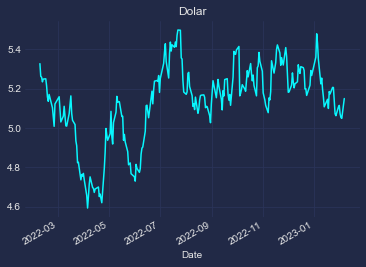

In [23]:
plt.style.use('cyberpunk')#usado para colocar estilo no gráfico
data_close.plot(y="dolar", use_index = True, legend=False)#colocou o nome da coluna a ser usada (o y representa o eixo das ordenadas), colocou que vai usar o index que é o date e não quis colocar legenda, mas poderia

plt.title('Dolar') #coloca o titulo
plt.savefig('dolar.png', dpi = 300) #salva a imagem, o dpi é para deixar a imagem legal, nem precisa usar ele se quiser
plt.show()#mostra o gráfico

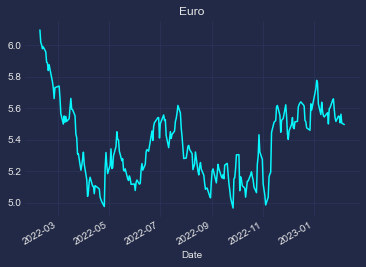

In [24]:
plt.style.use('cyberpunk')#usado para colocar estilo no gráfico
data_close.plot(y="euro", use_index = True, legend=False)#colocou o nome da coluna a ser usada (o y representa o eixo das ordenadas), colocou que vai usar o index que é o date e não quis colocar legenda, mas poderia

plt.title('Euro') #coloca o titulo
plt.savefig('euro.png', dpi = 300) #salva a imagem, o dpi é para deixar a imagem legal, nem precisa usar ele se quiser
plt.show()#mostra o gráfico

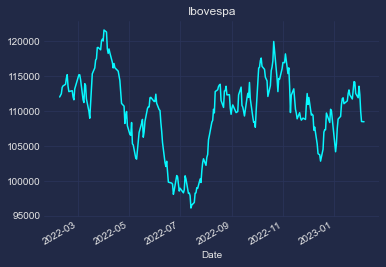

In [25]:
plt.style.use('cyberpunk')#usado para colocar estilo no gráfico
data_close.plot(y="ibovespa", use_index = True, legend=False)#colocou o nome da coluna a ser usada (o y representa o eixo das ordenadas), colocou que vai usar o index que é o date e não quis colocar legenda, mas poderia

plt.title('Ibovespa') #coloca o titulo
plt.savefig('ibov.png', dpi = 300) #salva a imagem, o dpi é para deixar a imagem legal, nem precisa usar ele se quiser
plt.show()#mostra o gráfico

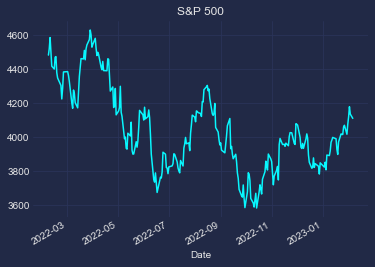

In [26]:
plt.style.use('cyberpunk')#usado para colocar estilo no gráfico
data_close.plot(y="s&p 500", use_index = True, legend=False)#colocou o nome da coluna a ser usada (o y representa o eixo das ordenadas), colocou que vai usar o index que é o date e não quis colocar legenda, mas poderia

plt.title('S&P 500') #coloca o titulo
plt.savefig('sp.png', dpi = 300) #salva a imagem, o dpi é para deixar a imagem legal, nem precisa usar ele se quiser
plt.show()#mostra o gráfico

In [27]:
outlook = win32.Dispatch('outlook.application')

#criar um email no outlook
#lembrando que não a conta, essa você tem que criar sozinho.
email = outlook.CreateItem(0)

Passo 7.2:

In [33]:
    email = outlook.CreateItem(0)
    email.To = 'thamirestorquato0@gmail.com'
    email.Subject = "Relatório Diário"
    email.Body = f''' 
    
    Bolsa Brasileira:
    
    No ano o Ibovespa teve uma rentabilidade de {retorno_anual_ibov}%,
    enquanto no mês a rentabilidade foi de {retorno_mensal_ibov}%.
    No último dia útil, o fechamento do Ibovespa ficou em {retorno_dia_ibov}%.
    
    Bolsa Estadunidense:
    
    No ano o S&P 500 teve uma rentabilidade de {retorno_anual_sp}%,
    enquanto no mês a rentabilidade foi de {retorno_mensal_sp}%.
    No último dia útil, o fechamento do S&P 500 ficou em {retorno_dia_sp}%.
    
    Dólar
    
    No ano o Dólar teve uma rentabilidade de {retorno_anual_dolar}%,
    enquanto no mês a rentabilidade foi de {retorno_mensal_dolar}%.
    No último dia útil, o fechamento do Dólar ficou em {retorno_dia_dolar}%.
    
    Euro:
    
    No ano o Euro teve uma rentabilidade de {retorno_anual_euro}%,
    enquanto no mês a rentabilidade foi de {retorno_mensal_euro}%.
    No último dia útil, o fechamento do Euro ficou em {retorno_dia_euro}%. 
    
        '''
    anexo_ibov = r'C:\Users\thami\OneDrive\Área de Trabalho\Meus Trabalhos\Projetos Python\Relatório\ibov.png'
    anexo_sp = r'C:\Users\thami\OneDrive\Área de Trabalho\Meus Trabalhos\Projetos Python\Relatório\sp.png'
    anexo_dolar = r'C:\Users\thami\OneDrive\Área de Trabalho\Meus Trabalhos\Projetos Python\Relatório\dolar.png'
    anexo_euro = r'C:\Users\thami\OneDrive\Área de Trabalho\Meus Trabalhos\Projetos Python\Relatório\euro.png'
    
    email.Attachments.Add(anexo_ibov)
    email.Attachments.Add(anexo_sp)
    email.Attachments.Add(anexo_dolar)
    email.Attachments.Add(anexo_euro)
    
    
    email.Send()
print("Enviado")

Enviado
